# Optical Character Recognition (OCR) with MNIST Dataset
This notebook demonstrates the process of building and training a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset. The MNIST dataset is a large collection of handwritten digits that is commonly used for training various image processing systems. Our goal is to develop a model that can accurately classify these digits.

In [44]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

## Data Loading


In [45]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()

# Visualizaing the dataset

In [46]:
import matplotlib.pyplot as plt
x_train.shape

(60000, 28, 28)

In [47]:
single_image= x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [48]:
single_image.shape

(28, 28)

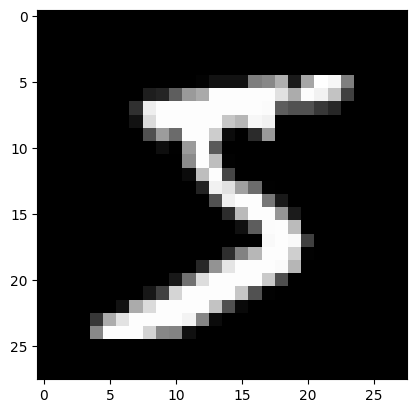

In [49]:
plt.imshow(single_image, cmap='gray')

## Data Preprocessing

Before feeding the data into our model, we need to preprocess it. This includes normalizing the pixel values to be between 0 and 1 for better model performance and reshaping the input data to fit our neural network architecture. Additionally, we'll convert our class labels into one-hot encoded vectors.


In [50]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
y_train.shape

(60000,)

One-hot encoding

In [53]:
y_example= to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [54]:
y_example.shape

(60000, 10)

In [55]:
y_cat_train= to_categorical(y_train,10)

In [56]:
y_cat_test=to_categorical(y_test,10)


In [57]:
single_image.max() #max pixels in a single image

255

In [58]:
single_image.min() #min pixels in a single image

0

Normalization of images

In [59]:
x_train= x_train/255
x_test= x_test/255

In [60]:
scaled_image=x_train[0]

In [61]:
scaled_image.max()


1.0

In [62]:
scaled_image.min()

0.0

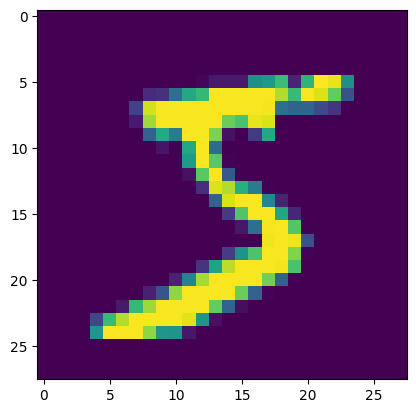

In [63]:
plt.imshow(scaled_image)

In [64]:
x_train.shape

(60000, 28, 28)

In [65]:
x_train= x_train.reshape(60000, 28,28,1)

In [66]:
x_train.shape

(60000, 28, 28, 1)

In [67]:
x_test= x_test.reshape(10000,28,28,1)

In [68]:
x_test.shape

(10000, 28, 28, 1)

# Model



In [69]:
model= Sequential() # Sequential model for layer-by-layer construction

model.add(Conv2D(filters=40, kernel_size=(3,3), input_shape= (28,28,1), activation= 'relu')) # Conv2D layer with 40 filters for feature extraction

model.add(MaxPool2D(pool_size=(2,2))) # MaxPooling2D layers for downsampling

model.add(Flatten()) # Flattening 2D layer into vector

model.add(Dense(128, activation= 'relu')) # Dense layer for learning non-linear combinations

model.add(Dense(10, activation='softmax')) # Output layer for multi-class classification

In [70]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 40)        400       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 40)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6760)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               865408    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 867098 (3.31 MB)
Trainable params: 867098 (3.31 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [72]:
model.fit (x_train,y_cat_train, epochs=2) #training model for 2 Epochs on training labels

Epoch 1/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1530 - accuracy: 0.9532
Epoch 2/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0528 - accuracy: 0.9844


In [73]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0468 - accuracy: 0.9847


[0.04678703472018242, 0.9847000241279602]

In [74]:
import numpy as np

In [75]:
# predictions on test set
predictions= model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


In [76]:
#model classification report
report= classification_report(y_test, prediction_classes) # model classification report
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Summary
This notebook walked through the process of building a CNN to classify handwritten digits using the MNIST dataset.

**Precision:** The model has high precision across all digits, mostly above 0.98, which means that when it predicts a digit, it is correct most of the time.

**Recall:** The recall scores are also high, suggesting that the model is good at finding all the relevant cases of each digit.

**F1-Score:** The F1-scores, which are the harmonic mean of precision and recall, are consistently high across all digits.

**Support:** The support values, which indicate the number of true instances for each digit in the test set, show a balanced distribution of digits, ensuring that the high scores are not due to class imbalance.

**Overall Accuracy:** The model achieves an overall accuracy of 0.99, which is exceptional.

The results indicate a high-performing model. Future work could explore model optimization techniques, such as hyperparameter tuning, to further improve performance.
